# Applied Machine Learning Assignment-I

# Libraries

In [2170]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# allow plots to appear directly in the notebook
%matplotlib inline

# Dataset: student.csv

In [2171]:
# read CSV file from the 'data' subdirectory using a relative path
student = pd.read_csv('student.csv')
# display the first 10 rows
student.head(10)


,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,127.0,116.0,117.0
1,male,group E,bachelor's degree,standard,none,124.0,134.0,131.0
2,male,group B,bachelor's degree,standard,none,145.0,139.0,136.0
3,male,group C,some college,standard,none,102.0,101.0,87.0
4,male,group B,master's degree,standard,completed,131.0,122.0,118.0
5,female,group C,high school,standard,none,126.0,127.0,121.0
6,male,group E,master's degree,standard,completed,143.0,139.0,135.0
7,male,group B,bachelor's degree,standard,none,95.0,87.0,82.0
8,female,group D,associate's degree,standard,none,91.0,95.0,110.0
9,male,group D,associate's degree,free/reduced,completed,93.0,104.0,93.0


In [2172]:
# print the shape of the DataFrame
student.shape
     

(1000, 8)

In [2173]:
# Type of Data
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race                         1000 non-null   object 
 2   parental level of education  995 non-null    object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   997 non-null    float64
 6   reading score                995 non-null    float64
 7   writing score                998 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [2174]:
# Summary of Null values
student.isnull().sum()

gender                         0
race                           0
parental level of education    5
lunch                          0
test preparation course        0
math score                     3
reading score                  5
writing score                  2
dtype: int64

# Visualizing data distribution of non-numeric features

In [2175]:
# Checking categories and distribution of "gender" feature per category
student["gender"].value_counts()


male      841
female    159
Name: gender, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

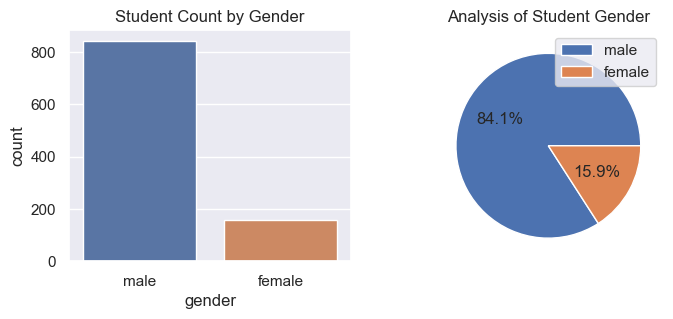

In [2176]:
# Visualizing "gender" feature with various ploting
lables=student["gender"].value_counts().index
values=student["gender"].value_counts().values

plt.figure(figsize=(8,3))

plt.subplot(1, 2, 1)
sns.barplot(x=lables, y=values)
plt.xlabel('gender')
plt.ylabel('count')
plt.title("Student Count by Gender")

plt.subplot(1, 2, 2)
plt.pie(values,autopct="%1.1f%%")
plt.title("Analysis of Student Gender")
plt.legend(lables, loc='best')
plt.show


In [2177]:
# Checking categories and distribution of "race" feature per category
student["race"].value_counts()


group B    371
group D    251
group C    237
group E     97
group A     44
Name: race, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

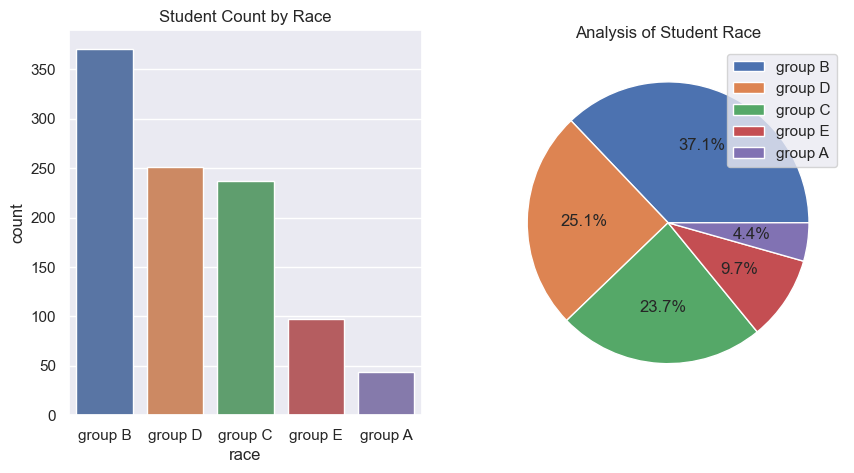

In [2178]:
# Visualizing "gender" feature with various ploting
lables=student["race"].value_counts().index
values=student["race"].value_counts().values

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.barplot(x=lables, y=values)
plt.xlabel('race')
plt.ylabel('count')
plt.title("Student Count by Race")

plt.subplot(1, 2, 2)
plt.pie(values,autopct="%1.1f%%")
plt.title("Analysis of Student Race")
plt.legend(lables, loc='best')
plt.show

In [2179]:
# Checking categories and distribution of "parental level of education" feature per category
student["parental level of education"].value_counts()


bachelor's degree     256
some high school      238
associate's degree    179
high school           137
master's degree       101
some college           84
Name: parental level of education, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

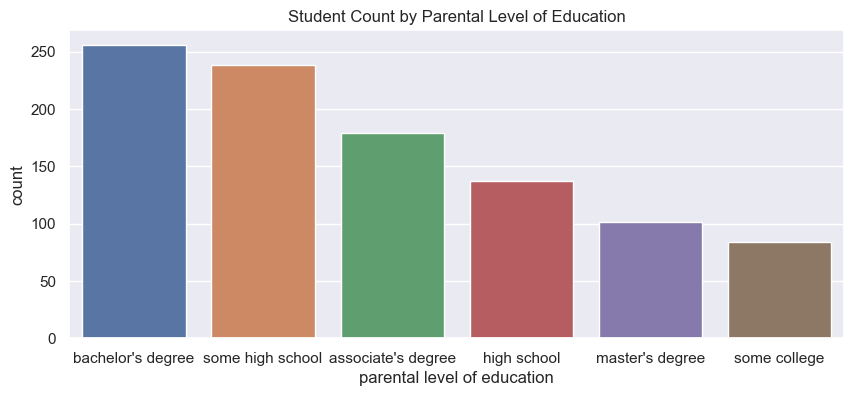

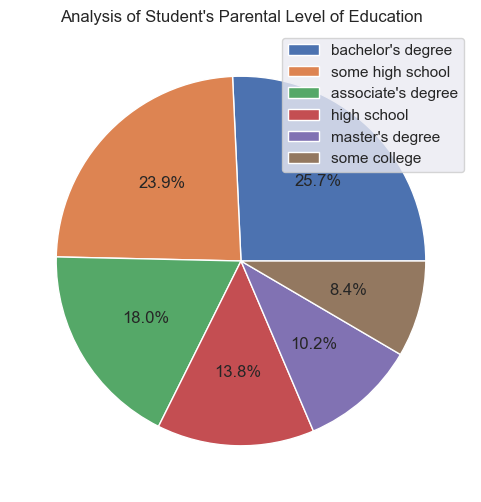

In [2180]:
# Visualizing "parental level of education" feature with various ploting
lables=student["parental level of education"].value_counts().index
values=student["parental level of education"].value_counts().values

plt.figure(figsize=(10,4))

#plt.subplot(1, 2, 1)
sns.barplot(x=lables, y=values)
plt.xlabel('parental level of education')
plt.ylabel('count')
plt.title("Student Count by Parental Level of Education")

plt.figure(figsize=(6,6))

#plt.subplot(1, 2, 2)
plt.pie(values,autopct="%1.1f%%")
plt.title("Analysis of Student's Parental Level of Education")
plt.legend(lables, loc='best')
plt.show

#plt.subplot()
#student['parental level of education'].value_counts().plot(kind='bar', title='Education of Parent', figsize=(10,5))
#plt.xticks(rotation=0)

In [2181]:
# replacing "some high school" with "high school"
student['parental level of education'] = student['parental level of education'].str.replace('some high school','high school')


In [2182]:
# Again Checking categories and distribution of "parental level of education" feature per category after combining above values
student["parental level of education"].value_counts()


high school           375
bachelor's degree     256
associate's degree    179
master's degree       101
some college           84
Name: parental level of education, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

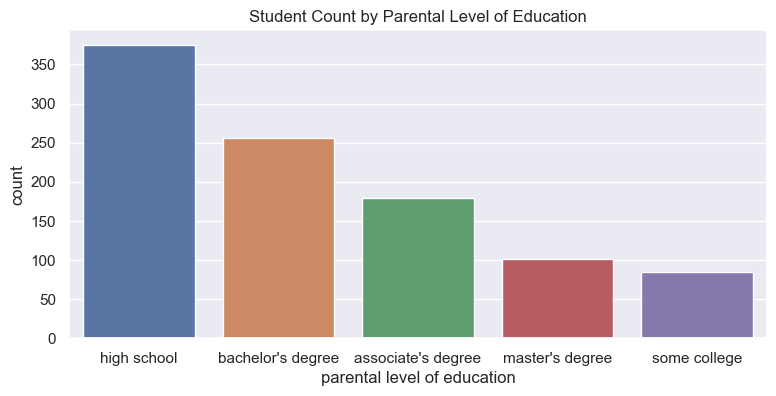

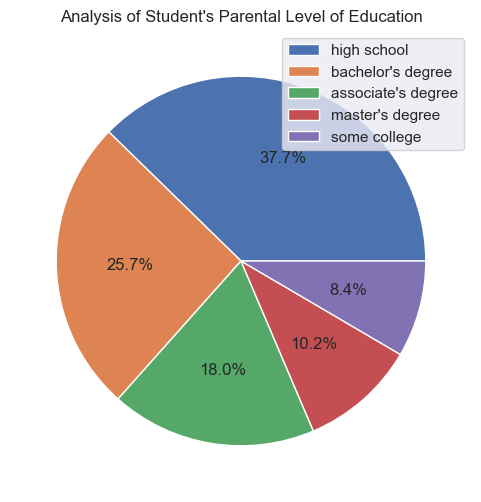

In [2183]:
# Visualizing "parental level of education" with various ploting after combining values "high school" and "some high school"
lables=student["parental level of education"].value_counts().index
values=student["parental level of education"].value_counts().values

plt.figure(figsize=(9,4))

#plt.subplot(1, 2, 1)
sns.barplot(x=lables, y=values)
plt.xlabel('parental level of education')
plt.ylabel('count')
plt.title("Student Count by Parental Level of Education")

plt.figure(figsize=(6,6))

#plt.subplot(1, 2, 2)
plt.pie(values,autopct="%1.1f%%")
plt.title("Analysis of Student's Parental Level of Education")
plt.legend(lables, loc='best')
plt.show

In [2184]:
# Checking categories and distribution of "lunch" feature per category
student["lunch"].value_counts()


standard        816
free/reduced    184
Name: lunch, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

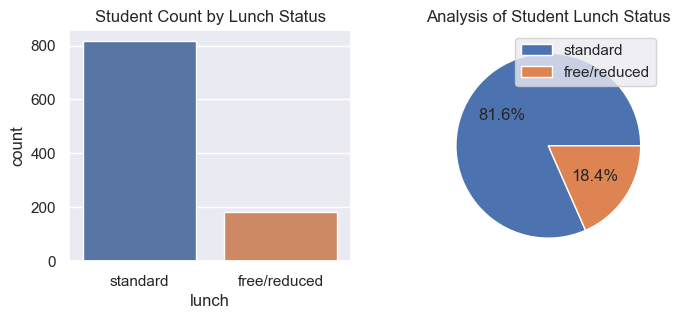

In [2185]:
# Visualizing "lunch" feature with various ploting
lables=student["lunch"].value_counts().index
values=student["lunch"].value_counts().values

plt.figure(figsize=(8,3))

plt.subplot(1, 2, 1)
sns.barplot(x=lables, y=values)
plt.xlabel('lunch')
plt.ylabel('count')
plt.title("Student Count by Lunch Status")

plt.subplot(1, 2, 2)
plt.pie(values,autopct="%1.1f%%")
plt.title("Analysis of Student Lunch Status")
plt.legend(lables, loc='best')
plt.show

In [2186]:
# Checking categories and distribution of "test preparation course" feature per category
student["test preparation course"].value_counts()


none         712
completed    288
Name: test preparation course, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

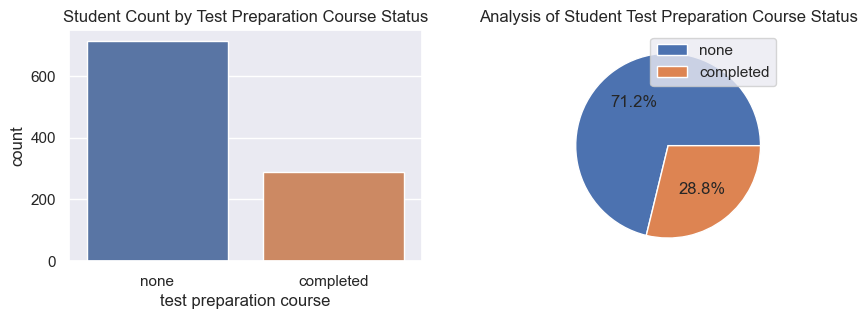

In [2187]:
# Visualizing "test preparation course" feature with various ploting
lables=student["test preparation course"].value_counts().index
values=student["test preparation course"].value_counts().values

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
sns.barplot(x=lables, y=values)
plt.xlabel('test preparation course')
plt.ylabel('count')
plt.title("Student Count by Test Preparation Course Status")

plt.subplot(1, 2, 2)
plt.pie(values,autopct="%1.1f%%")
plt.title("Analysis of Student Test Preparation Course Status")
plt.legend(lables, loc='best')
plt.show

# Visualizing the data distribution of numeric attributes/labels

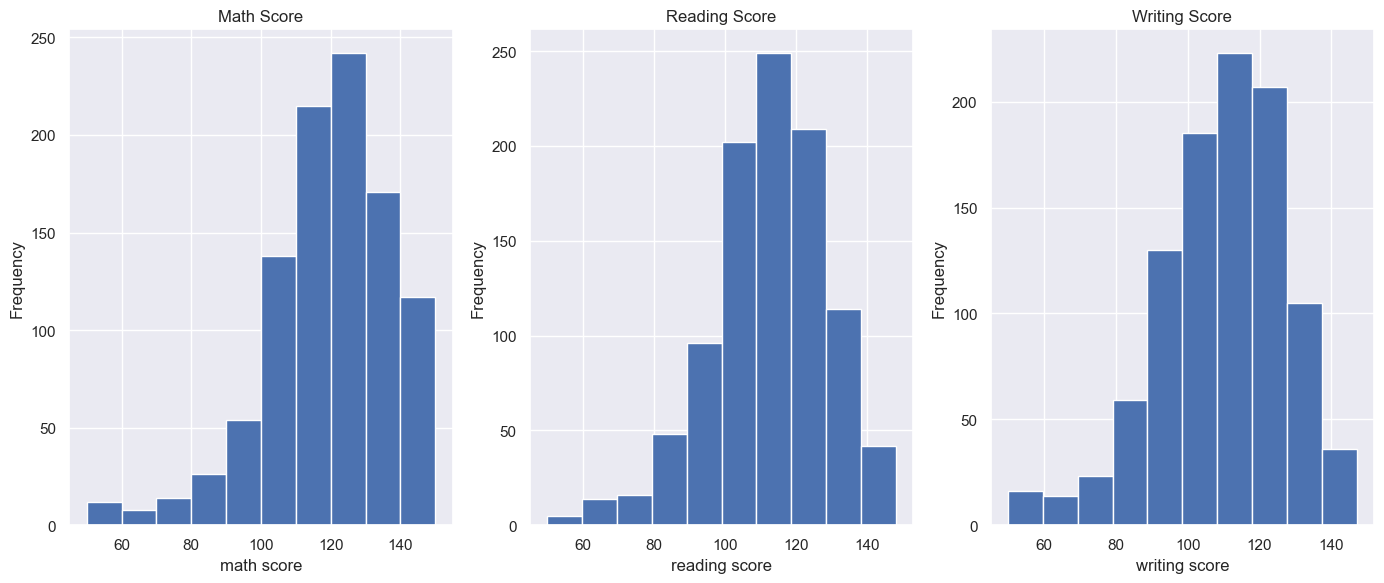

In [2188]:
# This show the class distribution of students performance in math, reading and writing
plt.figure(figsize=(14,6))

plt.subplot(1, 3, 1)
student["math score"].plot(kind='hist')
plt.title("Math Score")
plt.xlabel("math score")
plt.tight_layout()

plt.subplot(1, 3, 2)
student["reading score"].plot(kind='hist')
plt.title("Reading Score")
plt.xlabel("reading score")
plt.tight_layout()

plt.subplot(1, 3, 3)
student["writing score"].plot(kind='hist')
plt.title("Writing Score")
plt.xlabel("writing score")
plt.tight_layout()


# Describing all the numeric columns of the dataset

In [2189]:
student.describe()

,math score,reading score,writing score
count,997.000000,995.000000,998.000000
mean,119.010030,112.291457,109.652305
std,17.976443,16.430804,17.619981
min,50.000000,50.000000,50.000000
25%,109.000000,102.000000,99.000000
50%,120.000000,114.000000,111.000000
75%,131.000000,124.000000,122.000000
max,150.000000,148.000000,147.000000


# Measures of Central Tendency

In [2190]:
# Mean
mean = student["math score"].mean()
print("Mean - math score : " + str(mean)) 

mean = student["reading score"].mean()
print("Mean - reading score : " + str(mean)) 

mean = student["writing score"].mean()
print("Mean - writing score : " + str(mean)) 

# Median
median = student["math score"].median()
print("Median - math score : " + str(median)) 

median = student["reading score"].median()
print("Median - reading score : " + str(median)) 

median = student["writing score"].median()
print("Median - writing score : " + str(median)) 

# Mode
mode = student["math score"].mode()
print("Mode - math score : " + str(mode)) 

mode = student["reading score"].mode()
print("Mode - reading score : " + str(mode)) 

mode = student["writing score"].mode()
print("Mode - writing score : " + str(mode)) 

Mean - math score : 119.01003009027082
Mean - reading score : 112.29145728643216
Mean - writing score : 109.65230460921843
Median - math score : 120.0
Median - reading score : 114.0
Median - writing score : 111.0
Mode - math score : 0    117.0
Name: math score, dtype: float64
Mode - reading score : 0    108.0
1    117.0
Name: reading score, dtype: float64
Mode - writing score : 0    117.0
Name: writing score, dtype: float64


# Cleaning up data - Handling Missing Values

In [2191]:
# Checking for missing values of "math score"
student[student["math score"].isnull()]


,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
139,male,group E,high school,standard,completed,NaN,NaN,112.0
424,male,group B,NaN,standard,completed,NaN,83.0,77.0
729,male,group E,bachelor's degree,standard,none,NaN,83.0,NaN


In [2192]:
# Filling up missing value of "math score" by mean
mean_math = student["math score"].mean()
student["math score"].fillna(mean_math, inplace=True)

# After filling up missing values of "math score" with mean
student.loc[[139, 424, 729]]


,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
139,male,group E,high school,standard,completed,119.01003,NaN,112.0
424,male,group B,NaN,standard,completed,119.01003,83.0,77.0
729,male,group E,bachelor's degree,standard,none,119.01003,83.0,NaN


In [2193]:
# Checking for missing values of "reading score"
student[student["reading score"].isnull()]


,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,male,group D,NaN,standard,none,120.00000,NaN,116.0
115,female,group D,associate's degree,free/reduced,none,139.00000,NaN,117.0
139,male,group E,high school,standard,completed,119.01003,NaN,112.0
219,male,group B,high school,standard,none,116.00000,NaN,99.0
857,male,group C,NaN,free/reduced,none,120.00000,NaN,72.0


In [2194]:
# Filling up missing value of "reading score" by mean
mean_reading = student["reading score"].mean()
student["reading score"].fillna(mean_reading, inplace=True)

# After filling up missing values of "reading score" with mean
student.loc[[12, 115, 139, 219, 857]]

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,male,group D,NaN,standard,none,120.00000,112.291457,116.0
115,female,group D,associate's degree,free/reduced,none,139.00000,112.291457,117.0
139,male,group E,high school,standard,completed,119.01003,112.291457,112.0
219,male,group B,high school,standard,none,116.00000,112.291457,99.0
857,male,group C,NaN,free/reduced,none,120.00000,112.291457,72.0


In [2195]:
# Checking for missing values of "writing score"
student[student["writing score"].isnull()]

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
729,male,group E,bachelor's degree,standard,none,119.01003,83.0,NaN
780,male,group B,high school,standard,none,101.00000,100.0,NaN


In [2196]:
# Filling up missing value of "writing score" by mean
mean_writing = student["writing score"].mean()
student["writing score"].fillna(mean_writing, inplace=True)

# After filling up missing values of "writing score" with mean
student.loc[[729, 780]]

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
729,male,group E,bachelor's degree,standard,none,119.01003,83.0,109.652305
780,male,group B,high school,standard,none,101.00000,100.0,109.652305


In [2197]:
# Checking for missing values of "parental level of education"
student[student["parental level of education"].isnull()]

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,male,group D,NaN,standard,none,120.00000,112.291457,116.0
218,male,group E,NaN,standard,none,57.00000,147.000000,113.0
424,male,group B,NaN,standard,completed,119.01003,83.000000,77.0
857,male,group C,NaN,free/reduced,none,120.00000,112.291457,72.0
858,male,group E,NaN,free/reduced,none,134.00000,70.000000,89.0


In [2198]:
# Filling up missing value of "parental level of education" by most frequent education level
student = student.fillna(student['parental level of education'].value_counts().index[0])

# After filling up missing values of "parental level of education" with most frequent education level
student.loc[[12, 218, 424, 857, 858]]


,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,male,group D,high school,standard,none,120.00000,112.291457,116.0
218,male,group E,high school,standard,none,57.00000,147.000000,113.0
424,male,group B,high school,standard,completed,119.01003,83.000000,77.0
857,male,group C,high school,free/reduced,none,120.00000,112.291457,72.0
858,male,group E,high school,free/reduced,none,134.00000,70.000000,89.0


In [2199]:
# Summary of Null values after handling all missing/null values
student.isnull().sum()

gender                         0
race                           0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Cleaning up data - Handling Outliers

<AxesSubplot:>

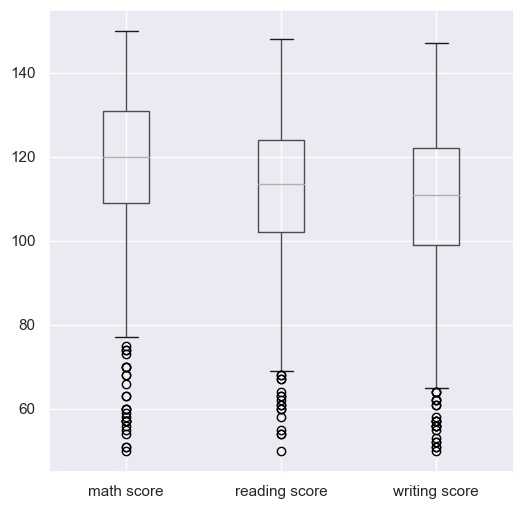

In [2200]:
# Checking the numeric columns for the outliers with the help of boxplot
sns.set(rc = {'figure.figsize':(6,6)})
student.boxplot()


In [2201]:
# Calculating the outliers for "maths score"
Q1 = student["math score"].quantile(0.25)
Q3 = student["math score"].quantile(0.75)

iqr = Q3 - Q1

upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

# Displaying the outliers for "math score"
student[student["math score"] < lower_limit]


,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,male,group B,bachelor's degree,standard,none,73.0,76.0,71.0
59,male,group C,associate's degree,standard,completed,55.0,61.0,53.0
79,male,group C,bachelor's degree,standard,none,66.0,112.0,111.0
128,male,group C,high school,standard,completed,70.0,126.0,117.0
181,male,group A,master's degree,standard,none,51.0,108.0,109.0
183,male,group C,bachelor's degree,free/reduced,none,56.0,113.0,113.0
208,male,group B,high school,standard,none,50.0,125.0,119.0
218,male,group E,high school,standard,none,57.0,147.0,113.0
232,male,group C,high school,standard,none,68.0,130.0,126.0
240,male,group D,bachelor's degree,standard,none,54.0,112.0,109.0


In [2202]:
# Calculating the outliers for "reading score"

Q1 = student["reading score"].quantile(0.25)
Q3 = student["reading score"].quantile(0.75)

iqr = Q3 - Q1

upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

# Displaying the outliers for "reading score"
student[student["reading score"] < lower_limit]

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
26,male,group B,high school,standard,none,124.0,60.0,98.0
59,male,group C,associate's degree,standard,completed,55.0,61.0,53.0
327,female,group B,some college,free/reduced,none,83.0,67.0,62.0
349,male,group B,associate's degree,standard,completed,142.0,50.0,68.0
427,male,group C,associate's degree,standard,none,124.0,54.0,108.0
466,male,group D,bachelor's degree,standard,none,81.0,63.0,81.0
543,male,group B,bachelor's degree,standard,completed,137.0,67.0,132.0
584,male,group D,bachelor's degree,free/reduced,none,124.0,55.0,120.0
629,male,group B,bachelor's degree,free/reduced,none,99.0,58.0,98.0
636,female,group B,high school,standard,none,122.0,61.0,124.0


In [2203]:
# Calculating the outliers for "writing score"

Q1 = student["writing score"].quantile(0.25)
Q3 = student["writing score"].quantile(0.75)

iqr = Q3 - Q1

upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

# Displaying the outliers for "writing score"
student[student["writing score"] < lower_limit]

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
14,male,group E,associate's degree,free/reduced,completed,105.0,97.0,64.0
31,male,group E,bachelor's degree,standard,none,118.0,109.0,64.0
43,male,group B,associate's degree,standard,none,114.0,109.0,57.0
59,male,group C,associate's degree,standard,completed,55.0,61.0,53.0
112,male,group B,high school,free/reduced,none,109.0,97.0,51.0
151,male,group C,high school,standard,none,132.0,111.0,57.0
197,male,group B,bachelor's degree,standard,none,110.0,100.0,52.0
246,female,group A,some college,standard,none,144.0,139.0,56.0
319,male,group D,associate's degree,free/reduced,none,111.0,109.0,52.0
327,female,group B,some college,free/reduced,none,83.0,67.0,62.0


# Visualizing data using seaborn

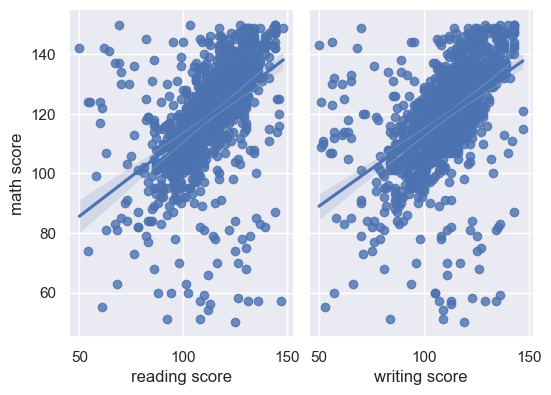

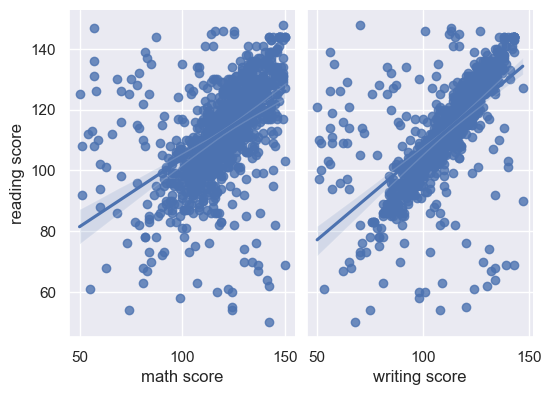

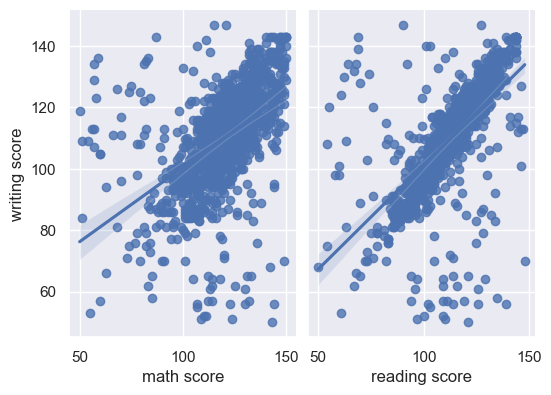

In [2204]:
# visualize the relationship between all 3 numerical columns using scatterplots
sns.pairplot(student, x_vars=['reading score','writing score'], y_vars='math score', height=4, aspect=0.7, kind='reg')
sns.pairplot(student, x_vars=['math score','writing score'], y_vars='reading score', height=4, aspect=0.7, kind='reg')
sns.pairplot(student, x_vars=['math score','reading score'], y_vars='writing score', height=4, aspect=0.7, kind='reg')

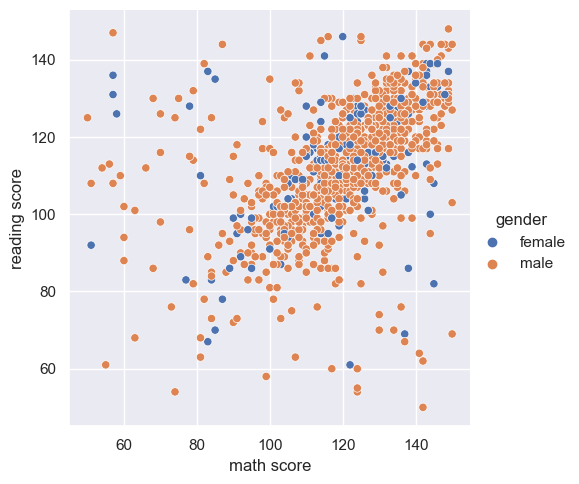

In [2205]:
# math score vs reading score
sns.relplot(x='math score', y='reading score', hue='gender', data=student)

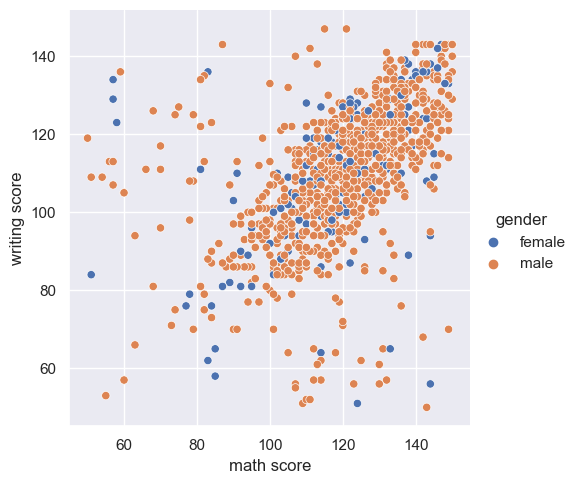

In [2206]:
# math score vs writing score
sns.relplot(x='math score', y='writing score', hue='gender', data=student)

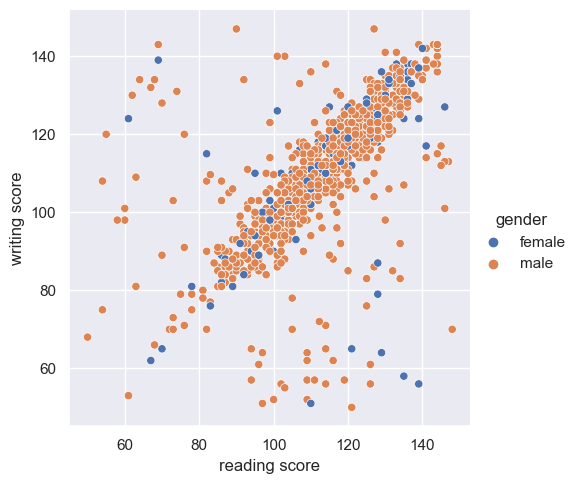

In [2207]:
# reading score vs writing score
sns.relplot(x='reading score', y='writing score', hue='gender', data=student)

<AxesSubplot:>

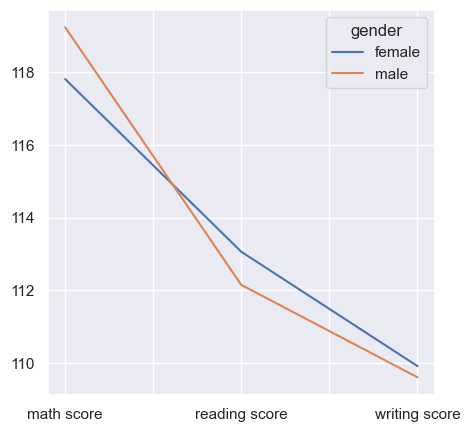

In [2208]:
# impact of "gender" on students' score using a line plot.
student.groupby('gender')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(5,5))

<AxesSubplot:>

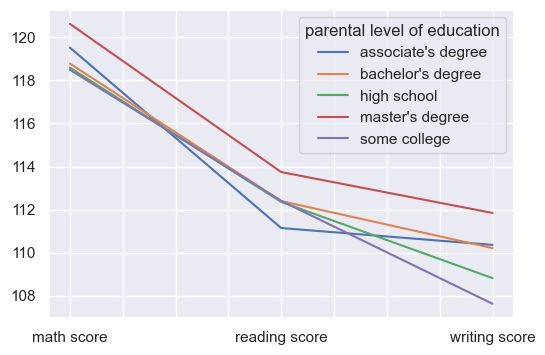

In [2209]:
student.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(6,4))

<AxesSubplot:>

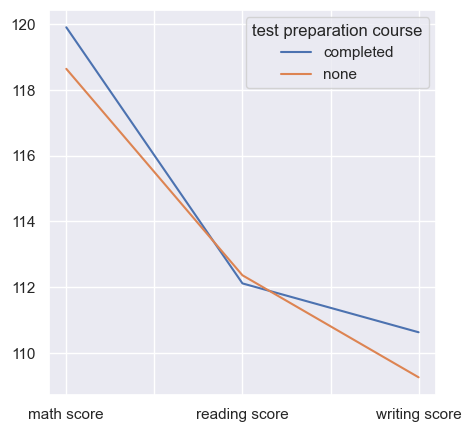

In [2210]:
student.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(5,5))

<AxesSubplot:>

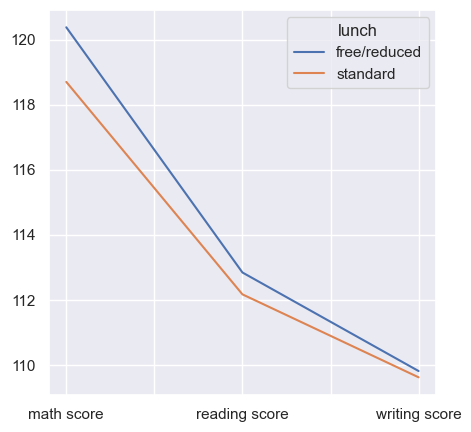

In [2211]:
student.groupby('lunch')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(5,5))

<AxesSubplot:>

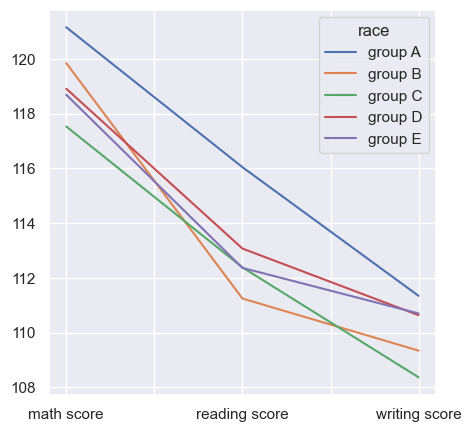

In [2212]:
student.groupby('race')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(5,5))

# Converting categorical feature to Numeric values

In [2213]:
# Replace gender: female : 0, male : 1
# Replace race: group A : 0, group B : 1, group C : 2, group D : 3, group E : 4
# Replace parental_level_of_education: high school : 0, some college : 1, bachelor's degree : 2, 
#                                      master's degree : 3, associate's degree : 4 
# Replace lunch: standard : 0, free/reduced : 1
# Replace test_preparation_course: none : 0, completed : 1

student.replace({'gender':{'female':0, 'male':1}}, inplace=True)
student.replace({'race':{'group A':0, 'group B':1, 'group C':2, 'group D':3, 'group E':4}}, inplace=True)
student.replace({'parental level of education':{'high school':0, 'some college':1, 'bachelor\'s degree':2, 
                                             'master\'s degree':3, 'associate\'s degree':4}}, inplace=True)
student.replace({'lunch':{'standard':0, 'free/reduced':1}}, inplace=True)
student.replace({'test preparation course':{'none':0, 'completed':1}}, inplace=True)
student.head()


,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,2,0,0,127.0,116.0,117.0
1,1,4,2,0,0,124.0,134.0,131.0
2,1,1,2,0,0,145.0,139.0,136.0
3,1,2,1,0,0,102.0,101.0,87.0
4,1,1,3,0,1,131.0,122.0,118.0


# Framing problem statement

# Correlation analysis

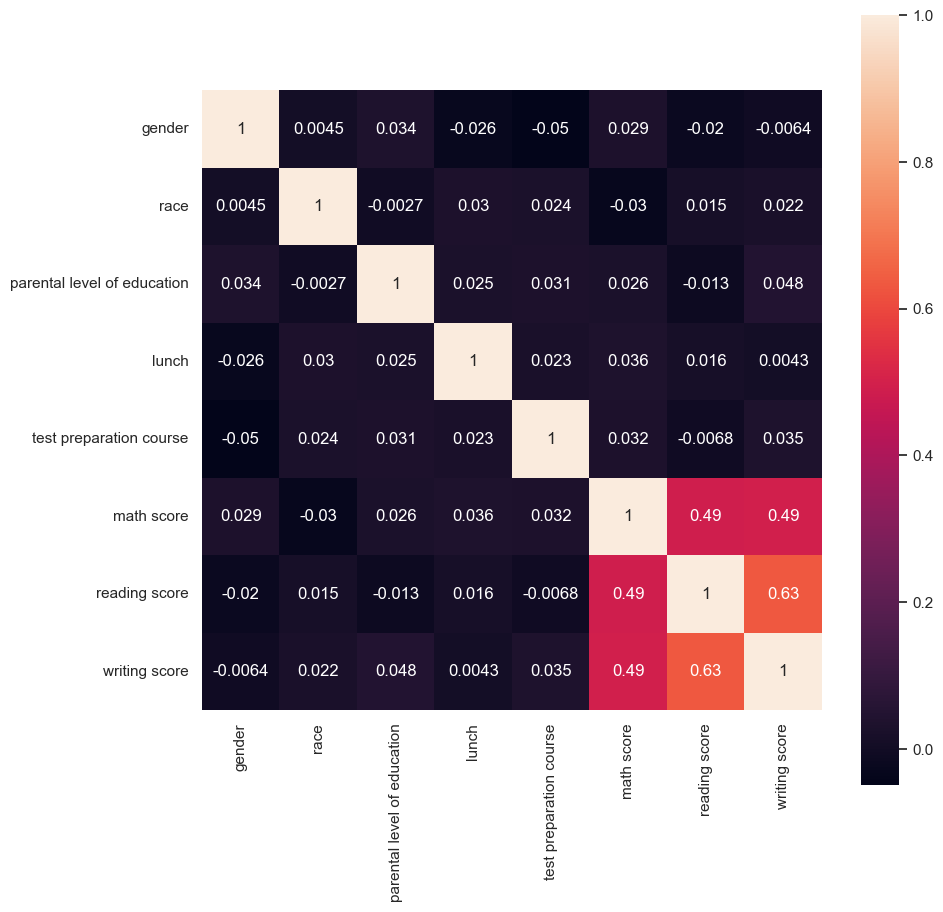

In [2214]:
# Corelation analysis for every possible combination of columns using heatmap
fig=plt.figure(figsize=(10,10))
corr = student.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

# Preparing Training and Test Set

In [2215]:
# Separating features (X) and labels(Y)

# Preparing X and Y using pandas
# Create a python list of features names

feature_cols = ['gender', 'race','parental level of education','lunch','test preparation course']

# Create a python list of labels names
label_cols = ['math score','reading score','writing score']

X = student[feature_cols]
Y = student[label_cols]


In [2216]:
# Printing sample features
X.head()

,gender,race,parental level of education,lunch,test preparation course
0,0,1,2,0,0
1,1,4,2,0,0
2,1,1,2,0,0
3,1,2,1,0,0
4,1,1,3,0,1


In [2217]:
# Printing sample labels
Y.head()

,math score,reading score,writing score
0,127.0,116.0,117.0
1,124.0,134.0,131.0
2,145.0,139.0,136.0
3,102.0,101.0,87.0
4,131.0,122.0,118.0


In [2218]:
# Splitting X and Y into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [2219]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(750, 5)
(750, 3)
(250, 5)
(250, 3)


# Building the Regression Model

In [2220]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, Y_train)

LinearRegression()

# Interpreting model coefficients

In [2221]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[118.09745525 113.93942413 108.11840974]
[[ 1.3907411  -0.57120522  0.5829011   1.91836924  0.02134614]
 [-1.21516627 -0.12564648 -0.27596898  0.52480916 -0.12717495]
 [ 0.00411428  0.13161492  0.36820317 -0.86145328  1.39447448]]


# Making predictions

In [2222]:
# make predictions on the testing set
Y_pred = linreg.predict(X_test)
Y_pred

array([[116.3838396 , 113.56248469, 108.51325451],
       [118.34578592, 112.4729649 , 108.38575386],
       [121.24859552, 111.49473547, 109.72695162],
       [121.24859552, 111.49473547, 109.72695162],
       [120.26415516, 112.99777406, 107.52430058],
       [118.92868702, 112.19699592, 108.75395703],
       [120.08279333, 112.04667342, 108.99054528],
       [119.53293425, 111.793852  , 110.51663468],
       [118.91699113, 112.59861138, 108.25413894],
       [116.97639095, 113.56095623, 109.77611406],
       [118.12084701, 113.13619321, 109.11804592],
       [121.45334912, 111.64260518, 109.26034311],
       [118.9403829 , 111.79538046, 109.25377513],
       [116.95504482, 113.68813117, 108.38163958],
       [120.11583535, 111.51788302, 110.88483785],
       [121.81980074, 111.62038195, 109.5953367 ],
       [122.59575955, 111.89389815, 108.99711326],
       [118.97342492, 111.26659006, 111.1480677 ],
       [117.7745807 , 112.34731842, 108.51736879],
       [120.08279333, 112.04667

In [2223]:
X_test.head(1)

,gender,race,parental level of education,lunch,test preparation course
507,0,3,0,0,0


In [2224]:
Y_test.head(1)

,math score,reading score,writing score
507,110.0,103.0,97.0


In [2225]:
# manually calculate the prediction for the row# 507

# Values predicted by model
# [116.3838396 , 113.56248469, 108.51325451]

# Values calculated manually

Y_manual_math = 118.09745525 + 1.3907411*0 + (-0.57120522)*3 + 0.5829011*0 + 1.91836924*0 + 0.02134614*0
Y_manual_reading =113.93942413 + (-1.21516627)*0 + (-0.12564648)*3 + (-0.27596898)*0 + 0.52480916*0 + (-0.12717495)*0
Y_manual_writing =108.11840974 + 0.00411428*0 + 0.13161492*3 + 0.36820317*0 + (-0.86145328)*0 + 1.39447448*0

print(Y_manual_math)
print(Y_manual_reading)
print(Y_manual_writing)

116.38383959
113.56248469
108.5132545


In [2226]:
# Predicted value of first 2 instances of the test set

# [116.3838396 , 113.56248469, 108.51325451]
# [118.34578592, 112.4729649 , 108.38575386]

# Actual value of the first 2 instances of the test set
Y_test.head(2)

,math score,reading score,writing score
507,110.0,103.0,97.0
818,115.0,116.0,111.0


# Evaluating Regression Model

In [2227]:
# calculate MAE, MSE, RMSE for linear regression model
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

13.365671193289465
294.9030526464931
17.17274155883367


In [2228]:
# math score prediction model#1 : 

# Create a python list of features names
feature_cols = ['parental level of education','lunch','test preparation course', 'reading score','writing score']

# Create a python list of labels names
label_cols = ['math score']

X = student[feature_cols]
Y = student[label_cols]

# Splitting X and Y into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, Y_train)

# make predictions on the testing set
Y_pred = linreg.predict(X_test)

# calculate MAE, MSE, RMSE for linear regression model
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


10.237863146499002
239.25025967333667
15.467716692302606


In [2229]:
# math score prediction model#2 : 

# Create a python list of features names
feature_cols = ['reading score','writing score']

# Create a python list of labels names
label_cols = ['math score']

X = student[feature_cols]
Y = student[label_cols]

# Splitting X and Y into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, Y_train)

# make predictions on the testing set
Y_pred = linreg.predict(X_test)

# calculate MAE, MSE, RMSE for linear regression model
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


10.128221871378694
234.04435855432325
15.298508376777235


In [2230]:
# reading score prediction model : 

# Create a python list of features names
feature_cols = ['math score','writing score']

# Create a python list of labels names
label_cols = ['reading score']

X = student[feature_cols]
Y = student[label_cols]

# Splitting X and Y into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, Y_train)

# make predictions on the testing set
Y_pred = linreg.predict(X_test)

# calculate MAE, MSE, RMSE for linear regression model
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


7.09664261461263
145.58227819678052
12.065748140781844


In [2231]:
# writing score prediction model : 

# Create a python list of features names
feature_cols = ['math score','reading score']

# Create a python list of labels names
label_cols = ['writing score']

X = student[feature_cols]
Y = student[label_cols]

# Splitting X and Y into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, Y_train)

# make predictions on the testing set
Y_pred = linreg.predict(X_test)

# calculate MAE, MSE, RMSE for linear regression model
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

8.077041378014808
158.4325357178815
12.586998677916888


# Exploring Other Models

In [2232]:
# Create a python list of features names
feature_cols = ['gender', 'race','parental level of education','lunch','test preparation course']

# Create a python list of labels names
label_cols = ['math score','reading score','writing score']

X = student[feature_cols]
Y = student[label_cols]

# Splitting X and Y into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [2233]:
# DecisionTreeRegressor

# instantiate
treereg = DecisionTreeRegressor()

# fit the model to the training data (learn the coefficients)
treereg.fit(X_train, Y_train)

DecisionTreeRegressor()

In [2234]:
# make predictions on the testing set
Y_pred = treereg.predict(X_test)
Y_pred

array([[108.4       , 110.        , 108.8       ],
       [115.93103448, 108.27586207, 104.65517241],
       [117.65384615, 108.46153846, 103.23076923],
       [117.65384615, 108.46153846, 103.23076923],
       [126.        , 118.4       ,  96.8       ],
       [117.66666667, 110.33333333, 108.33333333],
       [121.47058824, 112.32352941, 107.32352941],
       [112.8       , 110.        ,  88.6       ],
       [119.31372549, 111.61355799, 109.71867264],
       [ 97.        ,  91.        ,  87.        ],
       [105.33333333, 107.33333333, 116.33333333],
       [122.        , 117.5       , 113.        ],
       [117.78571429, 114.        , 112.57142857],
       [119.375     , 111.25      , 107.875     ],
       [124.66666667, 113.66666667, 127.33333333],
       [114.66666667,  97.66666667,  99.33333333],
       [110.66666667, 114.66666667, 110.        ],
       [139.        , 113.        , 130.        ],
       [120.66666667, 112.8974359 , 110.53846154],
       [121.47058824, 112.32352

In [2235]:
# calculate MAE, MSE, RMSE for DecisionTreeRegressor
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

14.52120141844923
347.13359038789827
18.631521419033344


In [2236]:
# RandomForestRegressor

# instantiate
forestreg = RandomForestRegressor()

# fit the model to the training data (learn the coefficients)
forestreg.fit(X_train, Y_train)

RandomForestRegressor()

In [2237]:
# make predictions on the testing set
Y_pred = forestreg.predict(X_test)
Y_pred

array([[106.61996789, 111.5968272 , 110.20952201],
       [115.64165502, 108.17070583, 104.4979605 ],
       [117.99965879, 108.75763189, 103.37255262],
       [117.99965879, 108.75763189, 103.37255262],
       [126.61122619, 116.82367857,  95.66333333],
       [118.65376724, 111.13569926, 109.41594433],
       [121.32917283, 111.92431802, 106.54056573],
       [113.94183117, 109.98942965,  87.43704437],
       [119.55084852, 111.23074402, 109.3828642 ],
       [100.76026389,  95.44477779,  91.7217772 ],
       [112.1384418 , 109.52530583, 108.85857957],
       [122.68675   , 117.86125   , 113.0545    ],
       [117.89851823, 114.02488028, 112.57665347],
       [119.84125244, 111.3480926 , 108.3971877 ],
       [124.04438095, 112.791     , 125.73490476],
       [115.74572914,  99.71552532, 100.99062123],
       [111.1926746 , 114.3390873 , 108.54405159],
       [137.02735339, 115.1755    , 127.16463794],
       [120.81745249, 113.03362481, 110.51683541],
       [121.32917283, 111.92431

In [2238]:
# calculate MAE, MSE, RMSE for RandomForestRegressor
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

14.282184106933983
333.2325893345849
18.254659386978023


# Insight